### Import Libraries and Data

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from wordcloud import WordCloud
import os

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:,.2f}'.format

In [369]:
API_KEY = os.environ.get('API_KEY_MOVIEDB')

In [370]:
movie_id_list = [671, 672, 673, 674, 675, 767, 12444, 12445]
json_list = []

In [371]:
for movie_id in movie_id_list:
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}"
    r = requests.get(url)
    if r.status_code == 200:
        data = r.json()
        json_list.append(data) 
    else:
        continue
             
df = pd.DataFrame(json_list)

### Data Inspection

In [372]:
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/t3LicFpYHeYpwqm7L5wDpd22hL5.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,397.97,/wuMc08IPKEatf9rnMNXvIDxqP4W.jpg,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2001-11-16,976475550,152,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the magic begin.,Harry Potter and the Philosopher's Stone,False,7.92,23575
1,False,/1stUIsjawROZxjiCMtqqXqgfZWC.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",100000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,672,tt0295297,en,Harry Potter and the Chamber of Secrets,"Cars fly, trees fight back, and a mysterious h...",373.23,/sdEOH0992YZ0QSxgXNIGLq1ToUi.jpg,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2002-11-13,876688482,161,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hogwarts is back in session.,Harry Potter and the Chamber of Secrets,False,7.73,18944
2,False,/obKmfNexgL4ZP5cAmzdL4KbHHYX.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",130000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,673,tt0304141,en,Harry Potter and the Prisoner of Azkaban,Year three at Hogwarts means new fun and chall...,319.28,/aWxwnYoe8p2d2fcxOqtvAtJ72Rw.jpg,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2004-05-31,789804554,141,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Something wicked this way comes.,Harry Potter and the Prisoner of Azkaban,False,8.02,18627
3,False,/5rrGVmRUuCKVbqUu41XIWTXJmNA.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,674,tt0330373,en,Harry Potter and the Goblet of Fire,When Harry Potter's name emerges from the Gobl...,354.56,/fECBtHlr0RB3foNHDiCBXeg9Bv9.jpg,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2005-11-16,895921036,157,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Dark And Difficult Times Lie Ahead.,Harry Potter and the Goblet of Fire,False,7.82,17922
4,False,/sO2VWeJ8qagNtYoznyLRL8TeSkw.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,675,tt0373889,en,Harry Potter and the Order of the Phoenix,Returning for his fifth year of study at Hogwa...,283.62,/5aOyriWkPec0zUDxmHFP9qMmBaj.jpg,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2007-06-28,938212738,138,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Evil Must Be Confronted.,Harry Potter and the Order of the Phoenix,False,7.69,16957


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  8 non-null      bool   
 1   backdrop_path          8 non-null      object 
 2   belongs_to_collection  8 non-null      object 
 3   budget                 8 non-null      int64  
 4   genres                 8 non-null      object 
 5   homepage               8 non-null      object 
 6   id                     8 non-null      int64  
 7   imdb_id                8 non-null      object 
 8   original_language      8 non-null      object 
 9   original_title         8 non-null      object 
 10  overview               8 non-null      object 
 11  popularity             8 non-null      float64
 12  poster_path            8 non-null      object 
 13  production_companies   8 non-null      object 
 14  production_countries   8 non-null      object 
 15  release_da

### Drop irrelevant columns

In [374]:
df = df.loc[:, ['title',
                'budget',
                'genres',
                'overview',
                'runtime',
                'production_countries',
                'popularity',
                'release_date',
                'revenue',
                'tagline',
                'vote_average',
                'vote_count']].sort_values(by = 'release_date', ascending = True)

### Change the datatyp of column release_date to datetime

In [375]:
df.release_date = pd.to_datetime(df.release_date)

### Add column profit

In [376]:
df['profit'] = df.revenue.sub(df.budget)

### Overview of the descriptive statistics

In [377]:
df.describe()

,budget,runtime,popularity,revenue,vote_average,vote_count,profit
count,8.00,8.00,8.00,8.00,8.00,8.00,8.00
mean,"160,000,000.00",147.25,334.72,"963,359,830.50",7.85,"18,420.00","803,359,830.50"
std,"57,755,642.89",10.44,46.00,"163,414,717.87",0.16,"2,249.90","178,055,175.56"
min,"100,000,000.00",130.00,276.82,"789,804,554.00",7.69,"16,610.00","659,804,554.00"
25%,"125,000,000.00",140.25,295.31,"891,112,897.50",7.72,"16,916.75","699,219,200.25"
50%,"140,000,000.00",149.00,336.92,"936,085,967.50",7.80,"17,925.50","761,304,759.00"
75%,"175,000,000.00",154.00,373.11,"959,848,288.50",7.94,"18,706.25","804,028,441.00"
max,"250,000,000.00",161.00,397.97,"1,341,511,219.00",8.12,"23,575.00","1,216,511,219.00"


### Normalize dictionaries to flat data 

In [378]:
df.genres[0]

[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}]

In [379]:
df.genres = df.genres.apply(lambda x: " | ".join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [380]:
df[['title', 'genres']]

,title,genres
0,Harry Potter and the Philosopher's Stone,Adventure | Fantasy
1,Harry Potter and the Chamber of Secrets,Adventure | Fantasy
2,Harry Potter and the Prisoner of Azkaban,Adventure | Fantasy
3,Harry Potter and the Goblet of Fire,Adventure | Fantasy | Family
4,Harry Potter and the Order of the Phoenix,Adventure | Fantasy | Mystery
5,Harry Potter and the Half-Blood Prince,Adventure | Fantasy
6,Harry Potter and the Deathly Hallows: Part 1,Adventure | Fantasy
7,Harry Potter and the Deathly Hallows: Part 2,Fantasy | Adventure


In [381]:
df.production_countries[0]

[{'iso_3166_1': 'GB', 'name': 'United Kingdom'},
 {'iso_3166_1': 'US', 'name': 'United States of America'}]

In [382]:
df.production_countries = df.production_countries.apply(lambda x: " | ".join(i['name'] for i in x) if isinstance(x, list) else np.nan)

In [383]:
df.production_countries.value_counts().to_frame()

,production_countries
United Kingdom | United States of America,8


### Creating a function for max and min questions

In [384]:
def max_min(col, dec, n = 1):
    if dec == 'max':
        return df[['title', col]].nlargest(n, col)
    elif dec == 'min':
        return df[['title', col]].nsmallest(n, col)
    else: 
        print("Wrong value")

### Which Harry Potter movie made the highest and lowest profit?

In [385]:
df['profit_by_billion'] = df.profit.div(1000000000)

In [386]:
max_min(col='profit_by_billion', dec='max')

,title,profit_by_billion
7,Harry Potter and the Deathly Hallows: Part 2,1.22


In [387]:
max_min('profit_by_billion', 'min')

,title,profit_by_billion
2,Harry Potter and the Prisoner of Azkaban,0.66


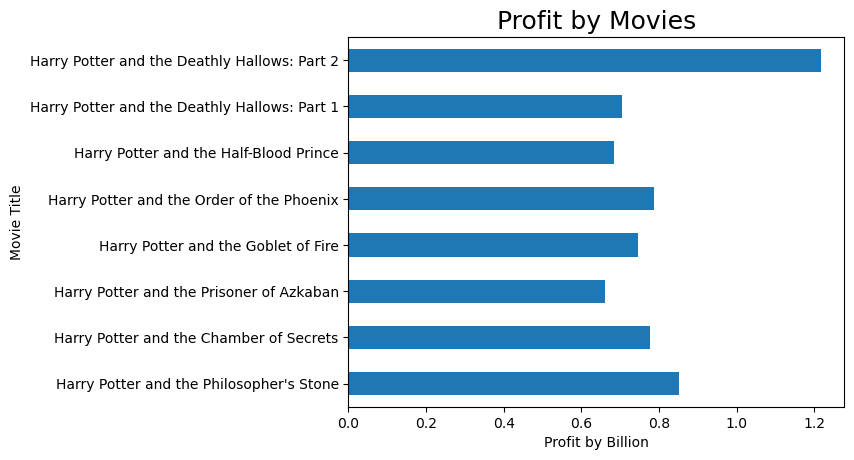

In [388]:
df.plot(kind = 'barh', x = 'title', y = 'profit_by_billion')
plt.title('Profit by Movies', fontsize = 18)
plt.xlabel('Profit by Billion')
plt.ylabel('Movie Title')
plt.legend('', frameon = False)
plt.show()

### Which Harry Potter movie has the highest and lowest popularity?

In [389]:
max_min('popularity', 'max')

,title,popularity
0,Harry Potter and the Philosopher's Stone,397.97


In [390]:
max_min('popularity', 'min')

,title,popularity
6,Harry Potter and the Deathly Hallows: Part 1,276.82


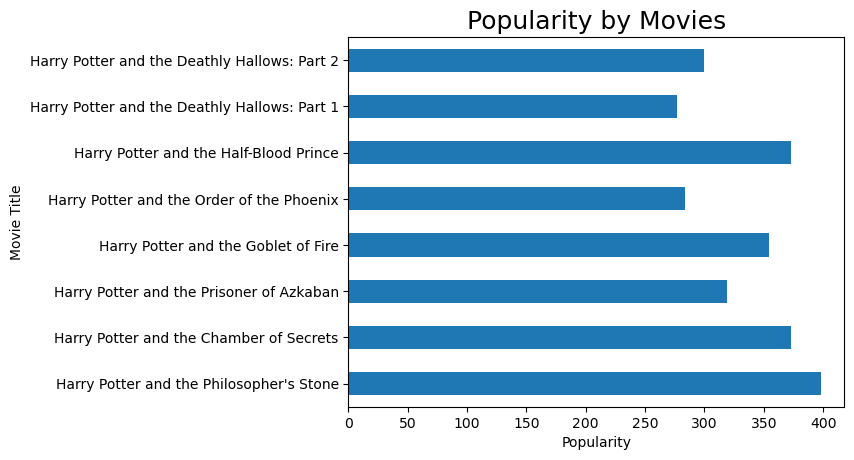

In [391]:
df.plot(kind = 'barh', x = 'title', y = 'popularity')
plt.title('Popularity by Movies', fontsize = 18)
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.legend('', frameon = False)
plt.show()

### Which Harry Potter movie has the best and worst rating?

In [392]:
max_min('vote_average', 'max')

,title,vote_average
7,Harry Potter and the Deathly Hallows: Part 2,8.12


In [393]:
max_min('vote_average', 'min')

,title,vote_average
4,Harry Potter and the Order of the Phoenix,7.69


### Which Harry Potter movie has the longest and shortest running time?

In [394]:
max_min('runtime', 'max')

,title,runtime
1,Harry Potter and the Chamber of Secrets,161


In [395]:
max_min('runtime', 'min')

,title,runtime
7,Harry Potter and the Deathly Hallows: Part 2,130


### What are the most common Words in the Movie Titles, Overviews and Taglines?

In [396]:
text = df.title + df.overview + df.tagline
text_join = ' '.join(text)

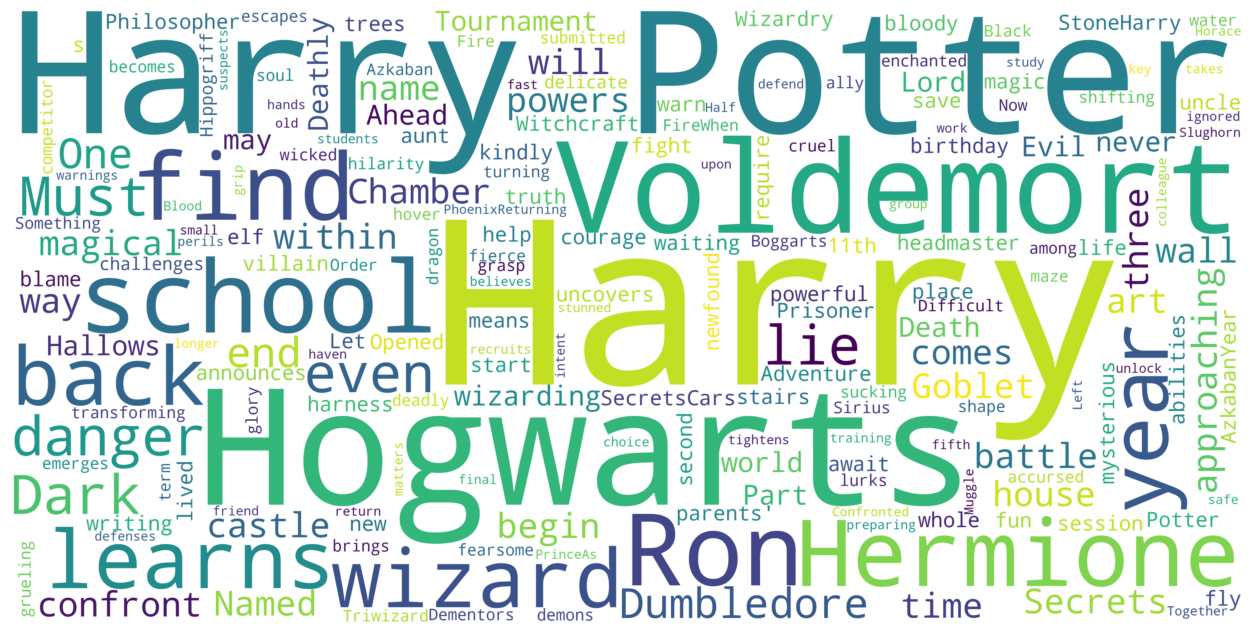

In [397]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(text_join)
title_wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

### Export converted data into a .csv file

In [398]:
df.to_csv("data_analysis_harry_potter.csv", index = False)